In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/Wholesale customers data.csv")

Data analysis

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [ ]:
data.shape

(440, 8)

In [ ]:

x = data[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]

In [ ]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

 1. Finding optimum value of k by calculating WCSS score from 1 to 10

In [ ]:
wcss = []
for i in range(1,11): # i = 1 to 10
  km = KMeans(n_clusters = i, n_init=10, init="k-means++")
  km.fit(x)
  css = km.inertia_ #gives wcss score
  wcss.append(css)

wcss

[157595857165.60907,
 113217528520.90988,
 80342166920.94073,
 64855740028.709335,
 53116919400.73702,
 46805183055.03322,
 41795023842.77521,
 36279831980.780396,
 33317825360.786327,
 29658826464.80393]

2. Finding optimum value of cluster using Elbow Method

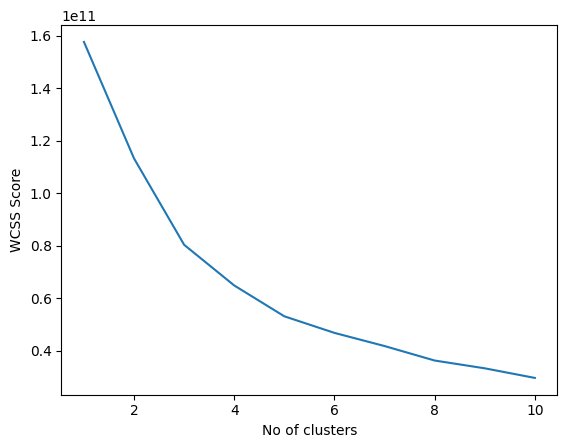

In [ ]:
plt.plot(range(1,11), wcss)
plt.xlabel("No of clusters")
plt.ylabel("WCSS Score")
plt.show()

Optimum No. of Cluster = 5

3. Creating model using this value

In [ ]:
km = KMeans(n_clusters = 5, n_init=10, init="k-means++")
km.fit(x)

KMeans(n_clusters=5, n_init=10)

In [ ]:
cluster_labels = km.predict(x)
pd.Series(cluster_labels).value_counts() #no. of values in each clusters

0    236
2    106
1     80
4     13
3      5
dtype: int64

4. Assign clusters to the data points

In [ ]:
data['Cluster'] = cluster_labels
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


5. Visualize the clusters (for two selected features, e.g., Fresh and Milk)

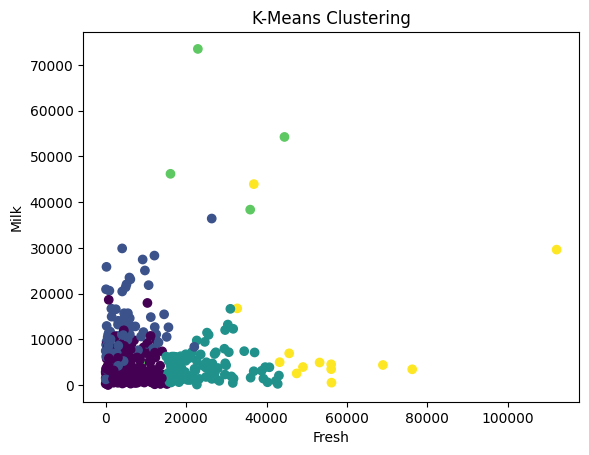

In [ ]:
plt.scatter(data['Fresh'], data['Milk'], c=data['Cluster'])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-Means Clustering')
plt.show()

6. Calculating Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
sil_score = silhouette_score(x,cluster_labels)
sil_score

0.38655390266596645

b. Agglomerative Heiarchical Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

1. Using Ward method for creating many clusters

In [ ]:
mergings = linkage(x, method = 'ward')

2.  Visualize the dendrogram

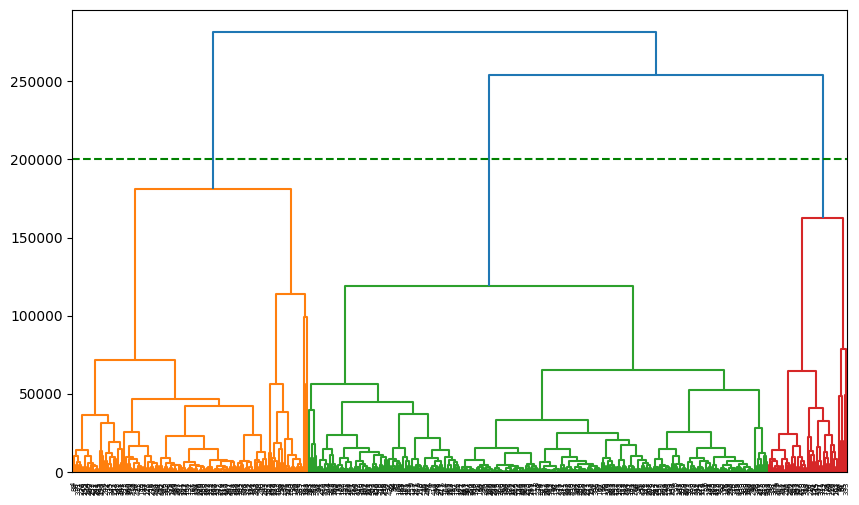

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergings)

plt.axhline(200000, color='green', linestyle="--")
plt.show()

3. Cut the dendrogram to get cluster labels

In [ ]:
cluster_labels_hc = fcluster(mergings, 200000, criterion = "distance" )

4. Assign cluster labels to the data

In [ ]:
data['Cluster'] = cluster_labels_hc

5.  Visualize the clusters (for two selected features, e.g., Fresh and Milk)

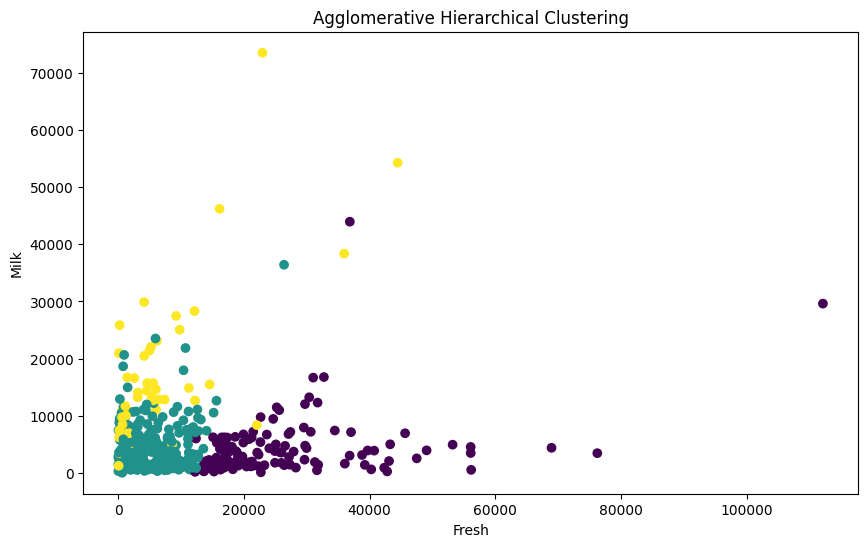

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Fresh'], data['Milk'], c=data['Cluster'], cmap='viridis')
plt.title('Agglomerative Hierarchical Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

6. Calculating Silhouette Score

In [ ]:
sil_score = silhouette_score(x,cluster_labels_hc)
sil_score

0.37501552145375117

K-means Clustering provides better Silhouette Score

4. Perform DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=20000, min_samples=100)
cluster_labels = dbscan.fit_predict(x)

In [ ]:
data['Cluster'] = cluster_labels

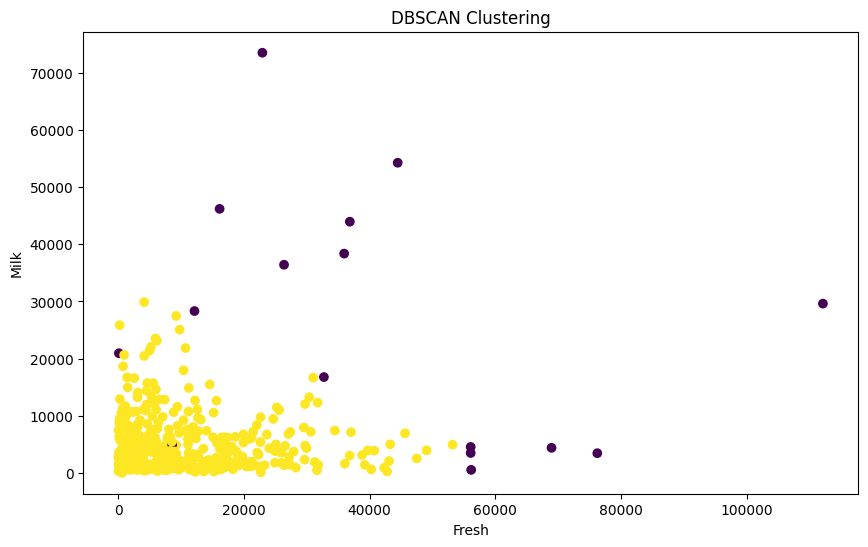

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Fresh'], data['Milk'], c=data['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

In [ ]:
sil_score = silhouette_score(x, cluster_labels)
sil_score

0.7042637098975454

 PCA for Dimensionality reduction.

1. Standardize data

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
x = pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [ ]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.194257
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.194257
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.194257
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0.194257
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.194257
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,0.194257
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0.194257
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,0.194257
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,0.194257


In [ ]:
data.drop(['Channel', 'Region', 'Cluster'], axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


2. Perform PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # Reduce to 2 dimensions for visualization

In [ ]:
pc_array = pca.fit_transform(x)

In [ ]:
pc_array.shape

(440, 2)

3. Create DataFrame for the principal components

In [ ]:
principal_df = pd.DataFrame(data=pc_array, columns=['PC1', 'PC2'])

4. Visualize the principal components

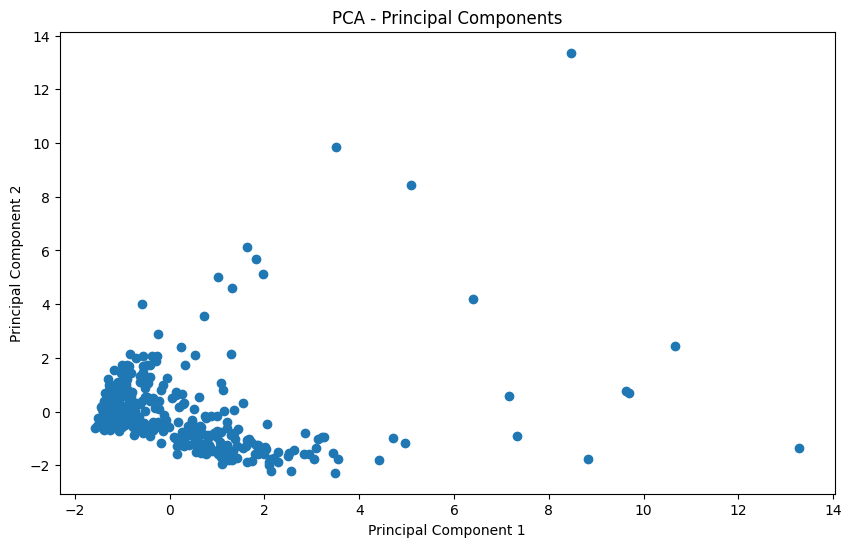

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.title('PCA - Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

5. Calculate explained variance ratio

In [ ]:
pca.explained_variance_

array([3.40571174, 2.07957507])

In [ ]:
pca.explained_variance_ratio_*100

array([37.75523871, 23.05387514])

6. Calculate correlation matrix of principal components

In [ ]:
correlation_matrix = principal_df.corr().round()
correlation_matrix

,PC1,PC2
PC1,1.0,-0.0
PC2,-0.0,1.0
